In [1]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [2]:
data = pd.read_csv('data/household_power_consumption.txt', sep = ';', header=0,low_memory=False,na_values='?', infer_datetime_format=True,parse_dates={'datetime':[0,1]}, index_col=['datetime']) 

In [3]:
data.fillna(data.mean(),inplace=True)

In [4]:
day_data = data.resample('D').sum()

In [5]:
day_data.isna().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [6]:
day_data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


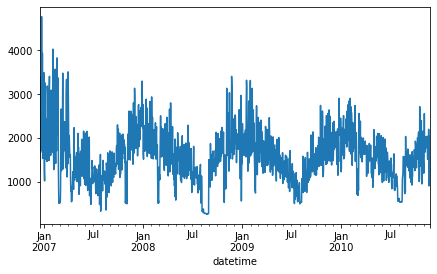

In [7]:
plt.figure(figsize=(7,4))
day_data['Global_active_power'].plot();

In [8]:
data['Global_active_power'].corr(data['Global_reactive_power'],method='pearson')

0.2470170526440613

In [9]:
data['Voltage'].corr(data['Global_intensity'],method='pearson')

-0.4113630717684697

In [10]:
day_data.reset_index(inplace=True)

In [11]:
X_train = day_data.iloc[:1077,:2]
X_test = day_data.iloc[1077:,:2]

In [12]:
X_test.shape,X_train.shape

((365, 2), (1077, 2))

In [13]:
X_train.columns = ['ds','y']
X_test.columns = ['ds','y']

In [14]:
X_train.head()

,ds,y
0,2006-12-16,1209.176
1,2006-12-17,3390.460
2,2006-12-18,2203.826
3,2006-12-19,1666.194
4,2006-12-20,2225.748


In [15]:
model = Prophet()
model.fit(X_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [16]:
preds = model.predict(X_test)

In [17]:
preds

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2009-11-27,1583.190064,1527.578278,2656.613411,1583.190064,1583.190064,519.281727,519.281727,519.281727,-64.134863,-64.134863,-64.134863,583.416590,583.416590,583.416590,0.0,0.0,0.0,2102.471791
1,2009-11-28,1583.325703,1852.479035,2934.446830,1583.325703,1583.325703,822.623601,822.623601,822.623601,245.926094,245.926094,245.926094,576.697507,576.697507,576.697507,0.0,0.0,0.0,2405.949304
2,2009-11-29,1583.461343,1843.186131,2957.971142,1583.461343,1583.461343,796.619624,796.619624,796.619624,228.622039,228.622039,228.622039,567.997585,567.997585,567.997585,0.0,0.0,0.0,2380.080967
3,2009-11-30,1583.596982,1429.649339,2566.938222,1583.596982,1583.596982,396.455904,396.455904,396.455904,-161.366961,-161.366961,-161.366961,557.822865,557.822865,557.822865,0.0,0.0,0.0,1980.052886
4,2009-12-01,1583.732622,1534.093140,2606.975403,1583.732622,1583.732622,517.348638,517.348638,517.348638,-29.350932,-29.350932,-29.350932,546.699570,546.699570,546.699570,0.0,0.0,0.0,2101.081260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2010-11-22,1632.020241,1490.871177,2566.730224,1618.982640,1646.167250,408.467746,408.467746,408.467746,-161.366961,-161.366961,-161.366961,569.834707,569.834707,569.834707,0.0,0.0,0.0,2040.487987
361,2010-11-23,1632.155880,1623.008629,2754.095675,1619.037089,1646.314943,550.568765,550.568765,550.568765,-29.350932,-29.350932,-29.350932,579.919697,579.919697,579.919697,0.0,0.0,0.0,2182.724646
362,2010-11-24,1632.291520,1603.022295,2729.290370,1619.092564,1646.546241,561.495882,561.495882,561.495882,-24.724438,-24.724438,-24.724438,586.220320,586.220320,586.220320,0.0,0.0,0.0,2193.787401
363,2010-11-25,1632.427159,1480.586768,2575.775192,1619.208110,1646.732496,393.957004,393.957004,393.957004,-194.970940,-194.970940,-194.970940,588.927944,588.927944,588.927944,0.0,0.0,0.0,2026.384163


In [18]:
y_true, y_pred = np.array(X_test['y']), np.array(preds['yhat'])
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
round(mape,2)

21.9

In [19]:
from sklearn.metrics import mean_squared_error

In [20]:
np.sqrt(mean_squared_error(X_test['y'],preds['yhat']))

375.0823952767086

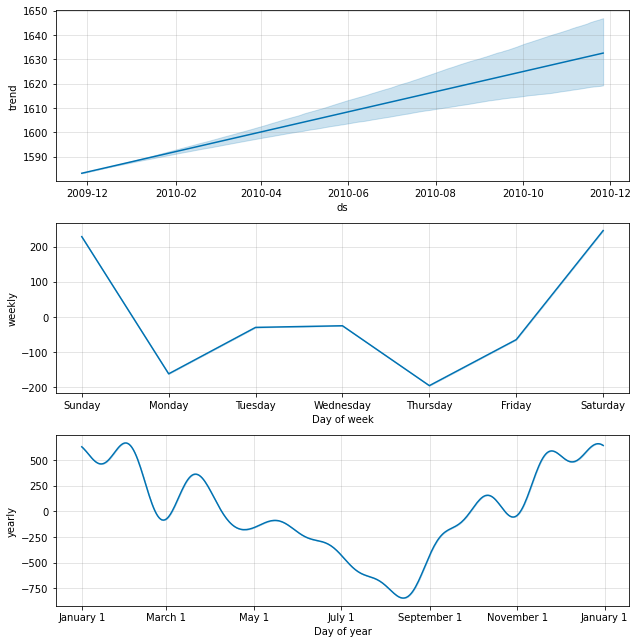

In [21]:
model.plot_components(preds);

In [22]:
day_data.columns = ['ds','y','add1','add2','add3','add4','add5','add6']

In [23]:
X_train = day_data.iloc[:1077,:]
X_test = day_data.iloc[1077:,:]

In [24]:
model = Prophet()
model.add_regressor('add1')
model.add_regressor('add2')
model.add_regressor('add3')
model.add_regressor('add4')
model.add_regressor('add5')
model.add_regressor('add6')
model.fit(X_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [25]:
preds = model.predict(X_test)

In [26]:
y_true, y_pred = np.array(X_test['y']), np.array(preds['yhat'])
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
# mape
2.53

2.53

In [27]:
np.sqrt(mean_squared_error(X_test['y'],preds['yhat']))

39.83678735594833

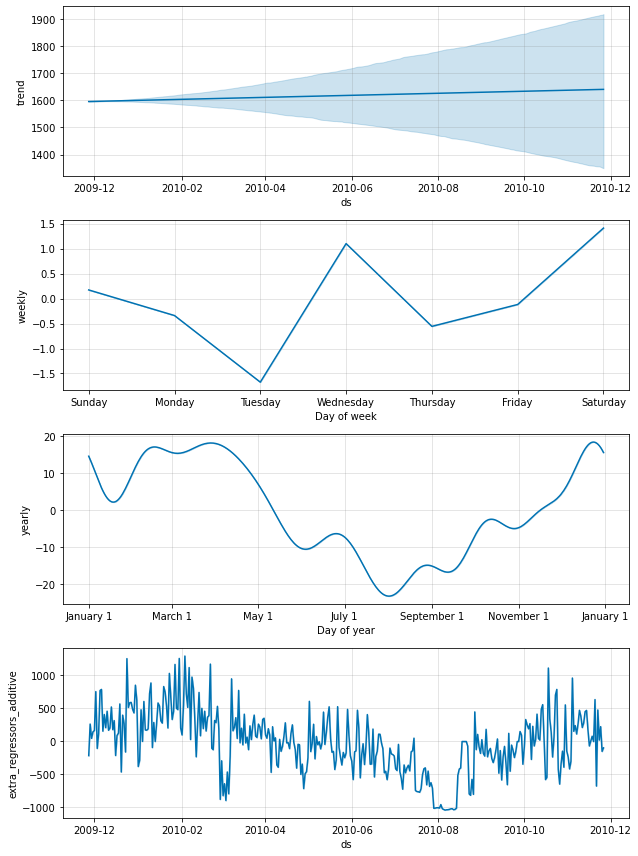

In [28]:
model.plot_components(preds);